In [2]:
#!pip install --user git+https://github.com/jwass/geopandas_osm

In [46]:
import geopandas_osm.osm
import geopandas as gp
import fiona
import os
from shapely.geometry import Polygon
from shapely.geometry import shape
import shapely
from matplotlib import pyplot
import matplotlib.pyplot as plt
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import geopandas
import json
import pyproj


os.chdir(r"C:\Users\User\Documents\Work\SDGs and AI\6.3.2\Shapefiles")

### Read shapefile

In [69]:
ct = gp.read_file("osm_lakes_gr.geojson")

### Bespoke search

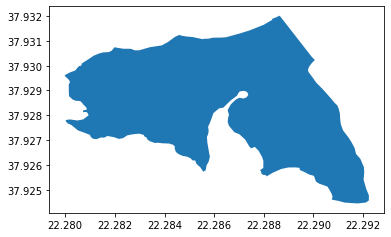

In [77]:
ct[ct['name:en'] == 'Lake Doksa'].plot()

In [79]:
ct[ct['name:en'] == 'Lake Doksa'].to_file("doksa.shp")

### OSM call

In [67]:
# total_bounds returns minx, miny, maxx, maxy
# osm call takes min lon, min lat, max lon, max lat

outer = ct[ct.NAME_ENGL=='Greece'].total_bounds

### manual bbox definitions
outer[3] = 37.94 # ymax
outer[1] = 37.92 # ymin
outer[2] = 22.30 # xmax
outer[0] = 22.27 # xmin


polygon_geom = Polygon([(outer[0],outer[1]),(outer[0],outer[3]),(outer[2],outer[3]),(outer[2],outer[1])])

In [68]:
### List of map tags https://wiki.openstreetmap.org/wiki/Map_Features

osm_lakes = geopandas_osm.osm.query_osm('way', polygon_geom, recurse='down', tags=['natural=water']) #,'water=lake'

C:\Users\User\Anaconda3\envs\geo\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


TypeError: sort_index() got an unexpected keyword argument 'by'

### Write to file

In [110]:
### Shape file
osm_lakes[osm_lakes.geometry.type=='LineString'].geometry.to_file('osm_lakes_gr.shp')

### CSV
osm_lakes.to_csv('osm_lakes_sk.csv')

### Interactive plot

In [111]:
m = Map(center=(52.3,8.0), zoom = 6, basemap= basemaps.Esri.WorldTopoMap)

pl_wb = wb[wb.country=='SK']
pl_osm = osm_lakes[osm_lakes.water=='lake']

osm = GeoData(geo_dataframe = pl_osm,
                   style={'color': 'black', 'fillColor': '#1e7a65', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'OSM Lakes')

wb = GeoData(geo_dataframe = pl_wb,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'EEA Lakes')

m.add_layer(osm)
m.add_layer(wb)
m.add_control(LayersControl())

m

Map(center=[52.3, 8.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…